In [2]:
# Loan Approval Prediction - Model Pipeline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
# 1. Load Processed Data
# =======================
df = pd.read_csv("../data/processed_loan_data.csv")

# =======================
# 2. Features & Target
# =======================
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']


In [3]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,1


In [4]:
# =======================
# 3. Train-Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =======================
# 4. Feature Scaling
# =======================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# =======================
# 5. Model Training
# =======================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    
    results.append([name, acc, prec, rec, f1, roc])

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.913349   0.920810  0.941620  0.931099  0.972550
1        Decision Tree  0.983607   0.983178  0.990584  0.986867  0.981360
2        Random Forest  0.982436   0.983146  0.988701  0.985915  0.998831
3                  SVM  0.944965   0.958333  0.952919  0.955619  0.986456
4                  KNN  0.894614   0.906077  0.926554  0.916201  0.961277


C:\Users\ghost\AppData\Local\Temp\ipykernel_19552\2252726250.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


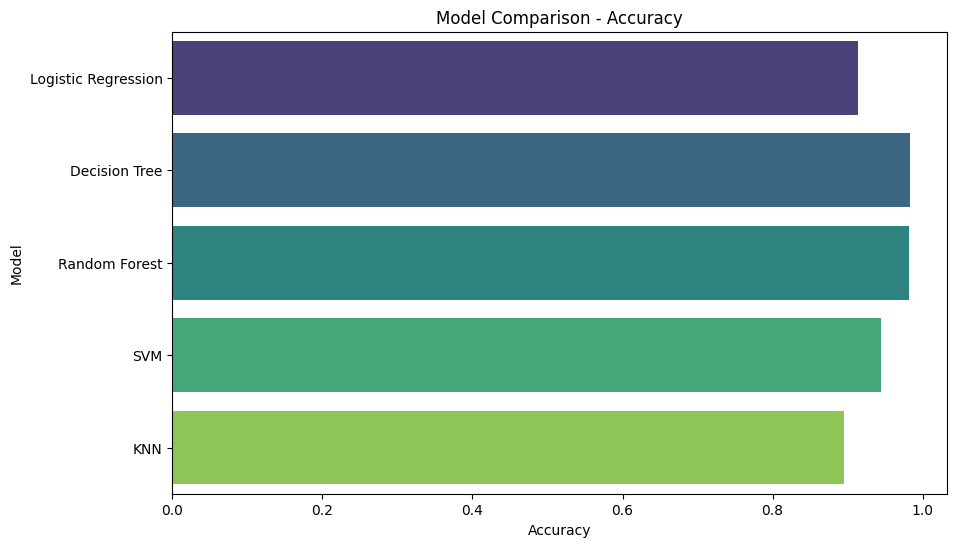

In [6]:
# =======================
# 6. Results DataFrame
# =======================
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
print(results_df)

# =======================
# 7. Visualization
# =======================
plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.show()